# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

#### Observation
The data was collected from a Portuguese bank that conducted 17 directed marketing campaigns between May 2008 and November 2010, primarily using telephone calls with human agents. The campaigns promoted an attractive long-term deposit product with good interest rates. The dataset consists of 79,354 contacts, with 6,499 successes, resulting in an 8% success rate. Various attributes were recorded for each contact, including whether the contact was successful or not.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook"
import time
import warnings
import string
import re
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, balanced_accuracy_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay , precision_recall_curve, PrecisionRecallDisplay
# Ignore warnings
warnings.filterwarnings('ignore')

In [4]:
df_raw = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [5]:
df_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df_raw.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### User-defined functions

In [8]:
def data_sanity_check(df):
    #print(df.describe())
    print('===Null values per columns: ')
    print(df.isnull().sum())
    print(f'===Duplicates found: {df.duplicated().sum()}')
    df = df.drop_duplicates()
    print(f'===Duplicates removed. Duplicates found: {df.duplicated().sum()}')

    return df

#### Initial Data Exploration


In [9]:
df_raw = data_sanity_check(df_raw)

===Null values per columns: 
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
===Duplicates found: 12
===Duplicates removed. Duplicates found: 0


#### Observation
No null values but a few duplicates found and removed.
There are 10 columns that have categorial values (i.e., object types). Let's examine them further.

In [10]:
#Explore  unique data in columns
df_unique = df_raw.nunique().to_frame().reset_index()
df_unique.columns = ['Variable','Unique counts']
print(df_unique)

          Variable  Unique counts
0              age             78
1              job             12
2          marital              4
3        education              8
4          default              3
5          housing              3
6             loan              3
7          contact              2
8            month             10
9      day_of_week              5
10        duration           1544
11        campaign             42
12           pdays             27
13        previous              8
14        poutcome              3
15    emp.var.rate             10
16  cons.price.idx             26
17   cons.conf.idx             26
18       euribor3m            316
19     nr.employed             11
20               y              2


#### Observations
From the above list, the features Age, Duration, Euribor3m, are the top 3 that have the most values.

#### Numerical-value columns

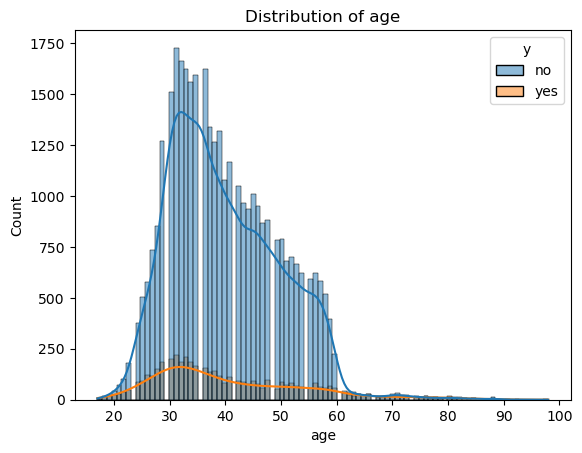

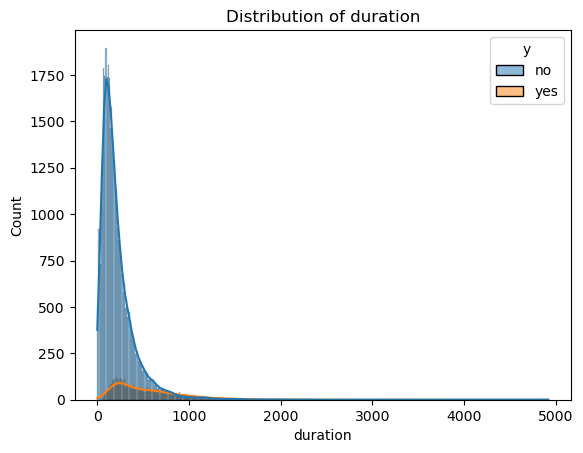

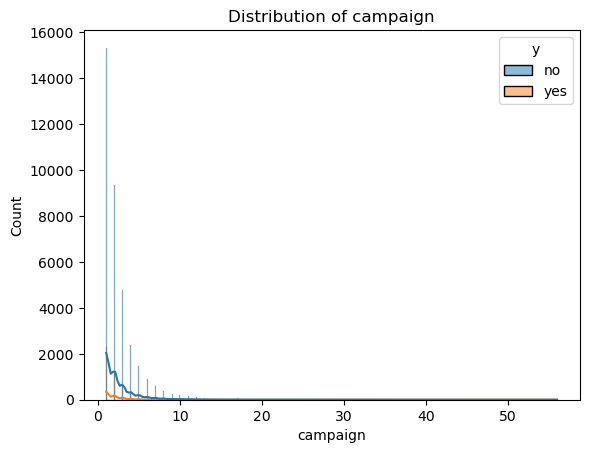

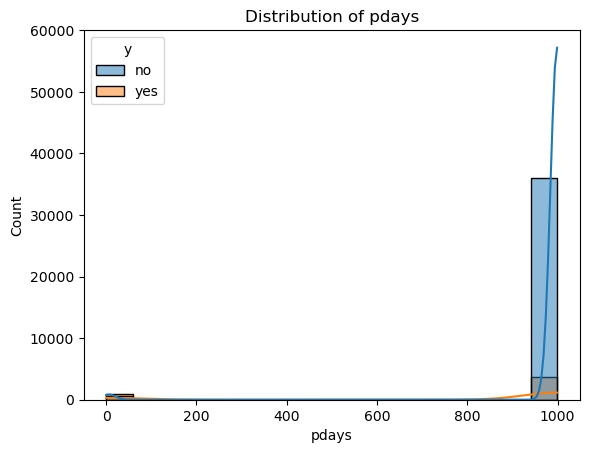

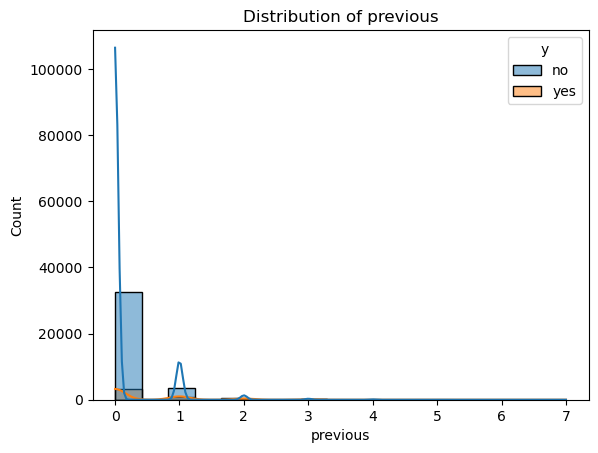

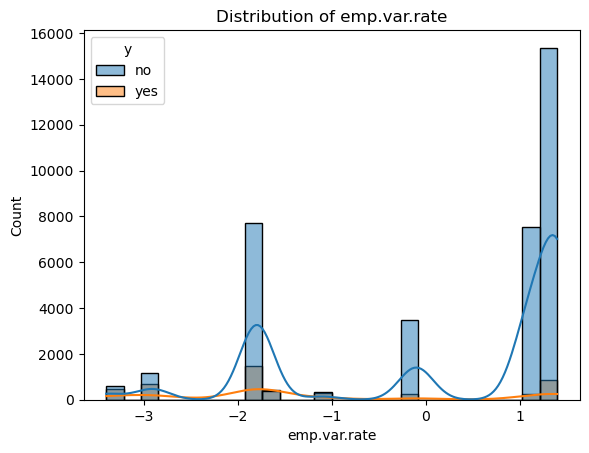

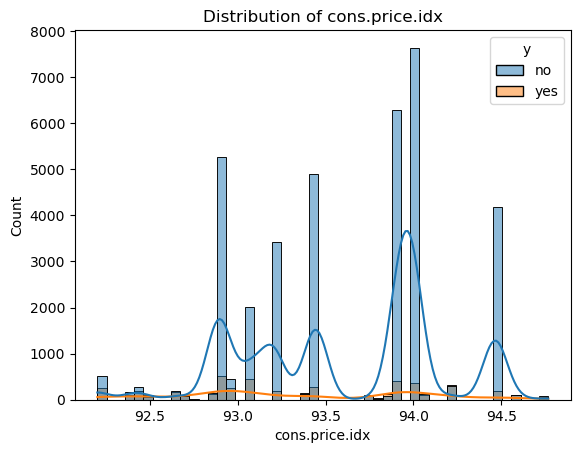

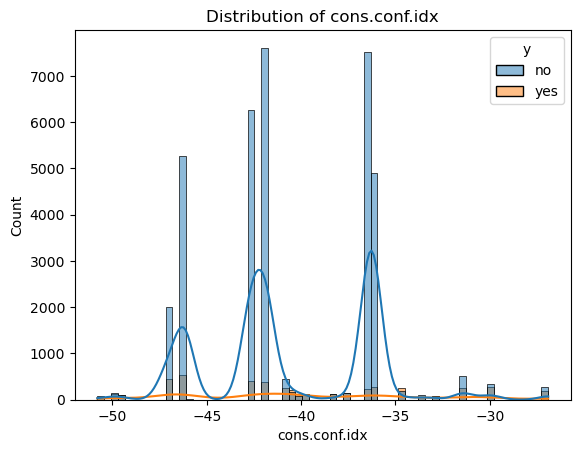

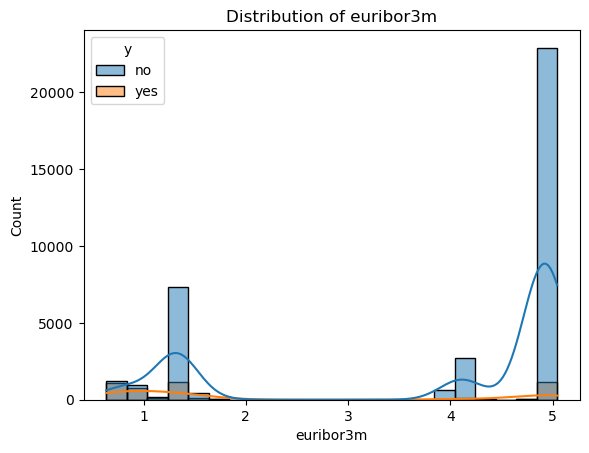

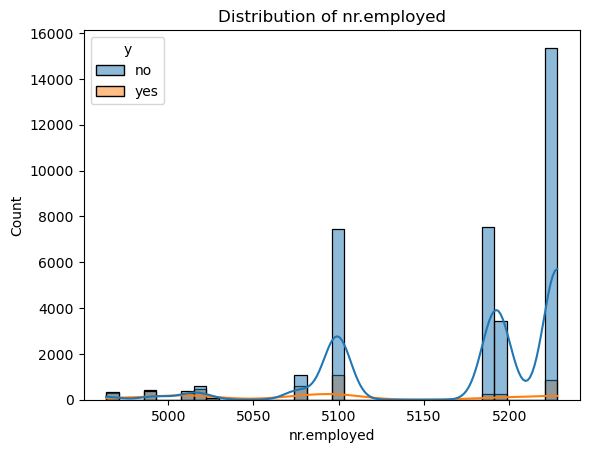

In [11]:
# Visualize data distributions
# Numeric variables
cols_numeric = df_raw.select_dtypes(exclude=['object']).columns

for col in cols_numeric:
    #sns.histplot(df_raw[col], kde=True)
    sns.histplot(data =df_raw, x = col, hue='y', kde=True)
    plt.title(f"Distribution of {col}")
    colname = col.replace(".", "_")
    plt.savefig(f"results/EDA_{colname}")
    plt.show()


#### Observations
Most of the distributions are very skewed, and not normally distributed. 

#### Non-Numerical-value columns

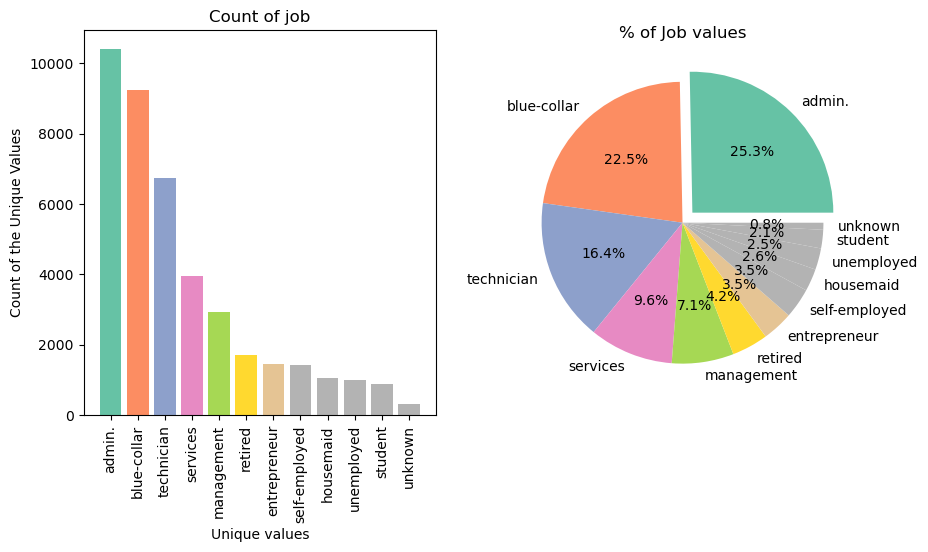

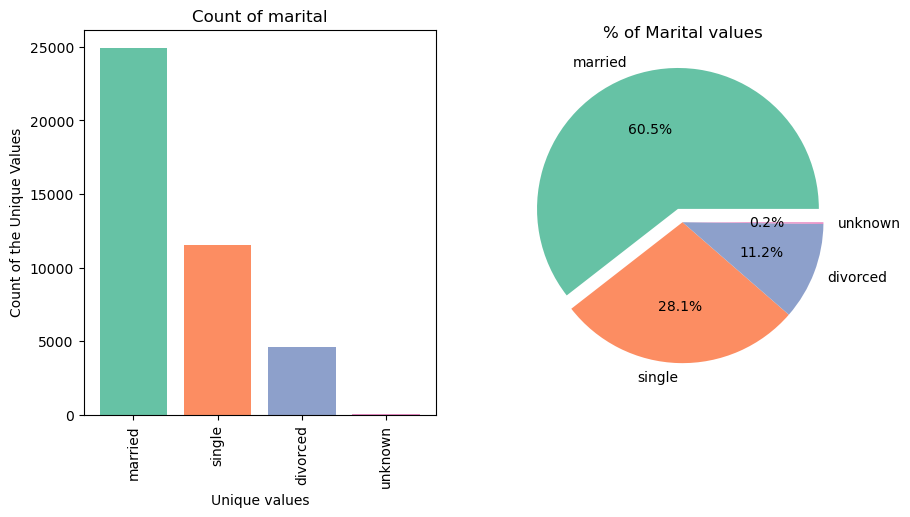

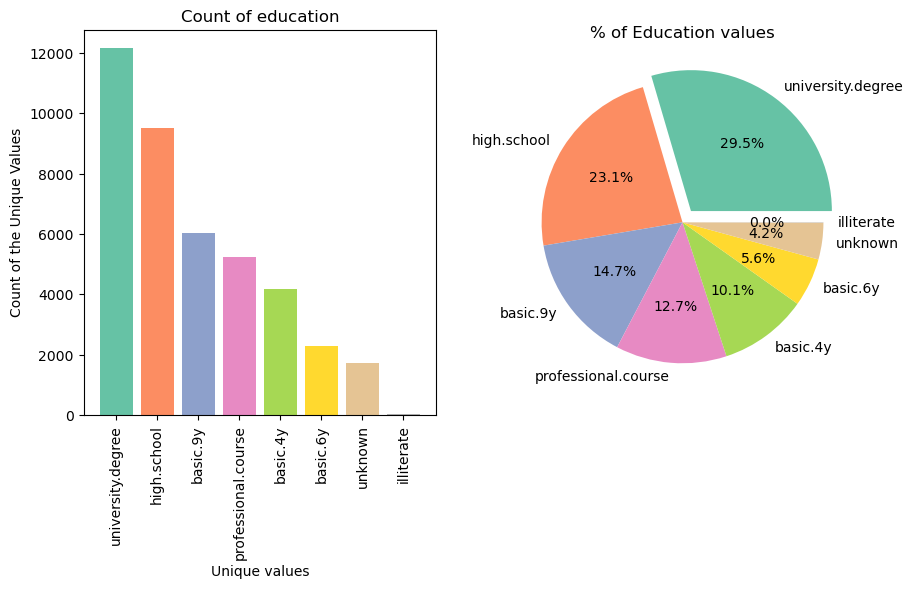

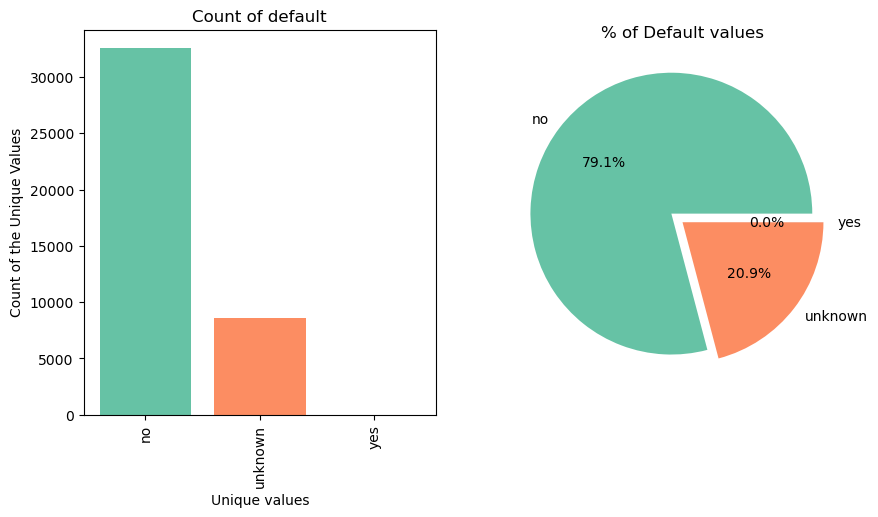

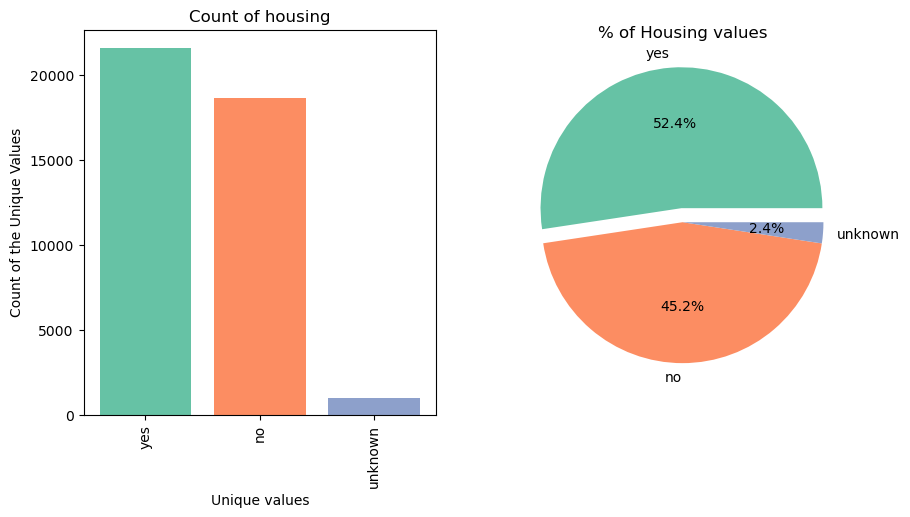

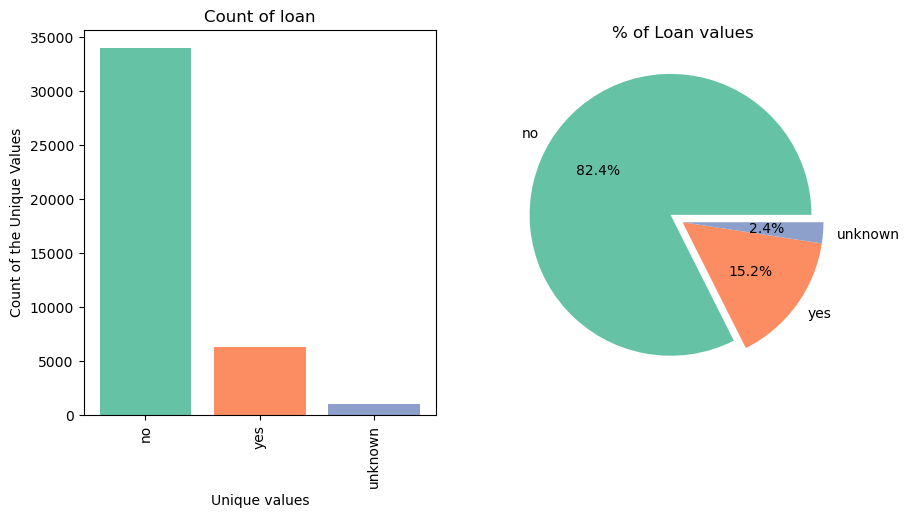

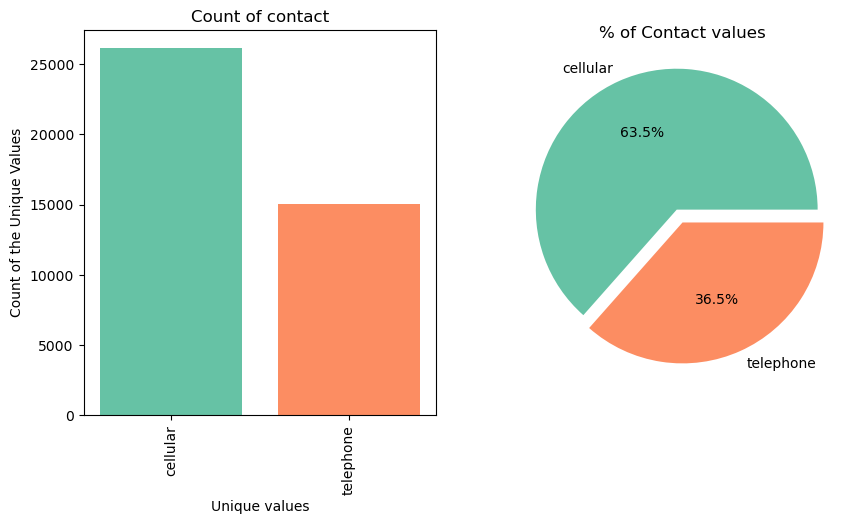

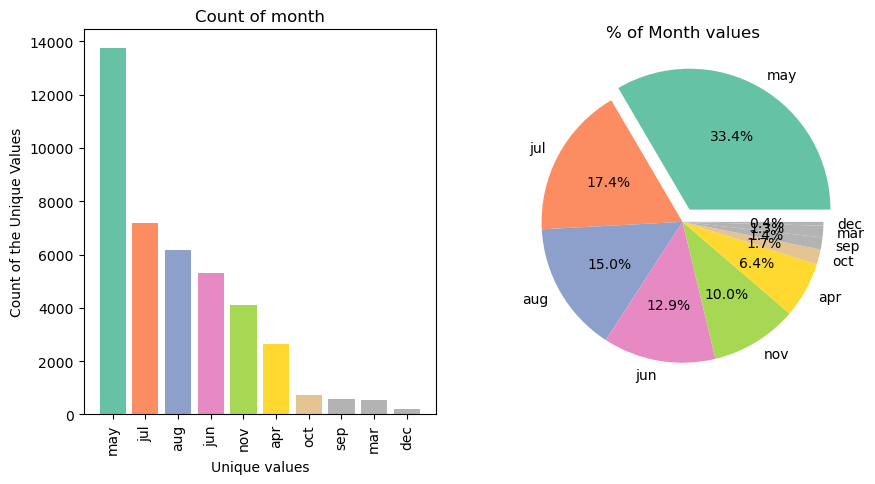

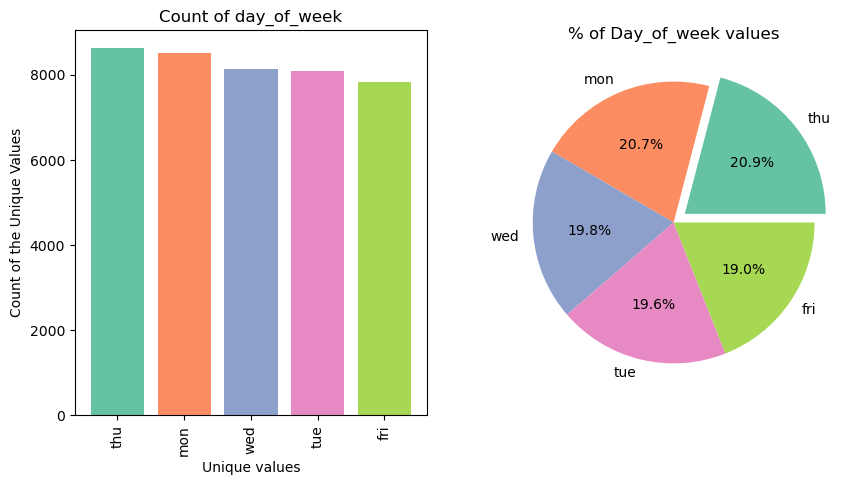

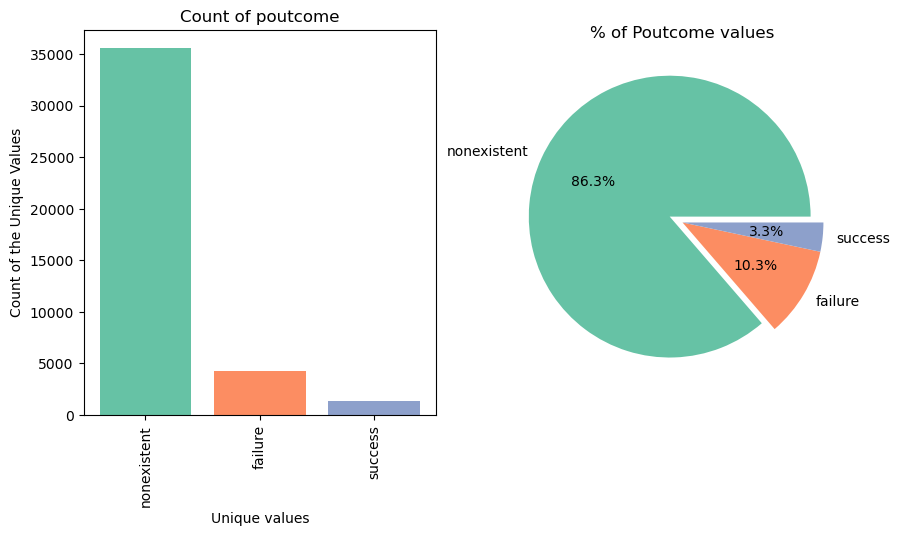

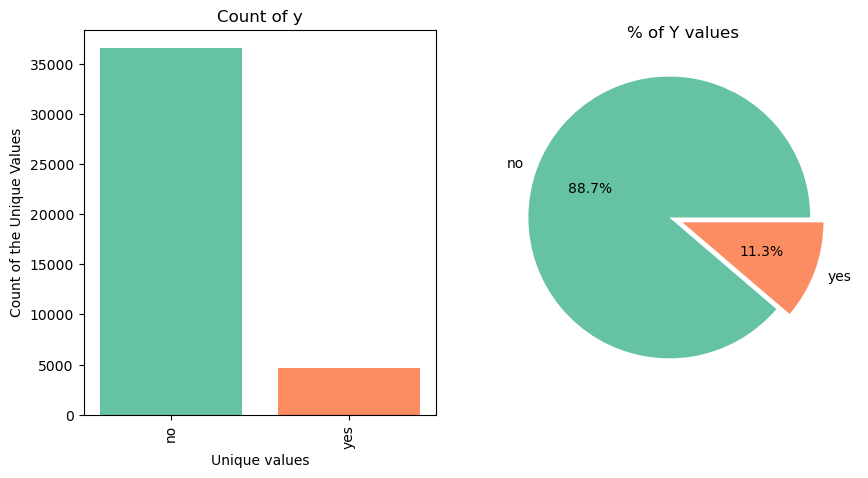

In [12]:
# Categorical variables
cols_obj = df_raw.select_dtypes(include=['object']).columns

for col in cols_obj:
    value_counts = df_raw[col].value_counts()

    # Make a colormap
    cmap = plt.get_cmap('Set2')

    # Make a list of colors based on the colormap
    colors = [cmap(i) for i in range(len(value_counts.index))]

    # Plot a 2-subplot figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plot a histogram chart of the count values
    ax1.bar(value_counts.index, value_counts.values, color=colors)
    #sns.barplot(ax1, x='month',y='duration' , data=df_raw , hue = "y")
    ax1.set_title(f"Count of {col}")
    ax1.set_xticklabels(value_counts.index, rotation=90)
    ax1.set_xlabel('Unique values')
    ax1.set_ylabel('Count of the Unique Values')

    # Plot a pie chart of the count values
    explode = np.zeros(len(value_counts.index))
    explode[0] = 0.1
    ax2.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', colors=colors, explode = explode)
    ax2.set_title(f"% of {col.capitalize()} values")

    # Save the plot
    plt.savefig(f"results/EDA_{col}")

    plt.show()


#### Observations
The above histogram illustrates the distribution of the target feature 'y' in the dataset, which is necessary for determining how the target feature is distributed. The data appears to be imbalanced, so we must take this into account when modeling.


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The task's business objective is to compare the performance of different classifiers, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines, on a dataset pertaining to the telephone marketing of bank products. 
The collected data is associated with 17 campaigns that occurred between May 2008 and November 2010, totaling 79354 contacts. 
This dataset's Output variable (desired outcome) is 'y'. 
The objective is to identify the most effective classifier for this specific dataset, which will assist the bank in optimizing their marketing strategies and increasing the success rate of their campaigns.


In [13]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

#### Data filtering

In [14]:
#Contact columns are not really useful in determining the results
df1 = df_raw.drop('contact', axis=1)


In [15]:
#Drop data that 'duration' < 5s since it does not make sense of any calls less than 5 sec anyway
df2 = df1.drop(df1[(df1['duration']<5)].index, axis = 0, inplace = False)

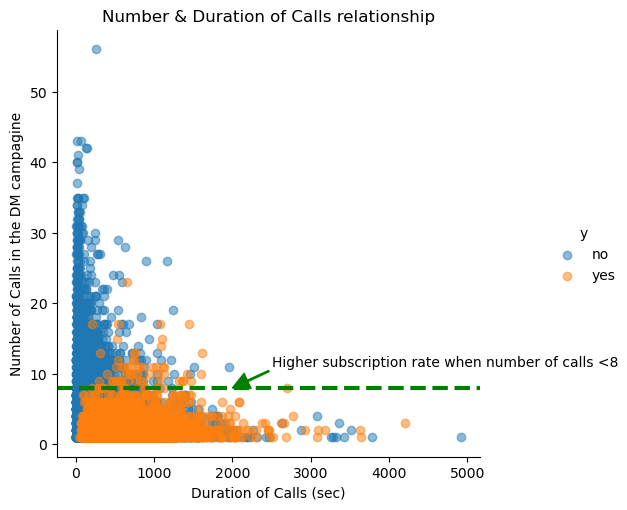

In [16]:
#Plot the relationship between 'duration' & 'campaign': with y result
duration_call_plot = sns.lmplot(data = df2, x='duration', y='campaign',
                     fit_reg = False, hue = 'y',
                     scatter_kws={'alpha':0.5,}, height =5)
plt.ylabel('Number of Calls in the DM campagine')
plt.xlabel('Duration of Calls (sec)')
plt.title('Number & Duration of Calls relationship')

# Label
threshold_y = 8
plt.axhline(y=threshold_y, linewidth=3, color="green", linestyle='--')
plt.annotate('Higher subscription rate when number of calls <8',xytext = (2500,threshold_y +3),
             arrowprops=dict(color = 'green', width=1),xy=(2000,threshold_y))
plt.savefig("results/EDA_call_duration")
plt.show()

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

#### Correlation Matrix among features

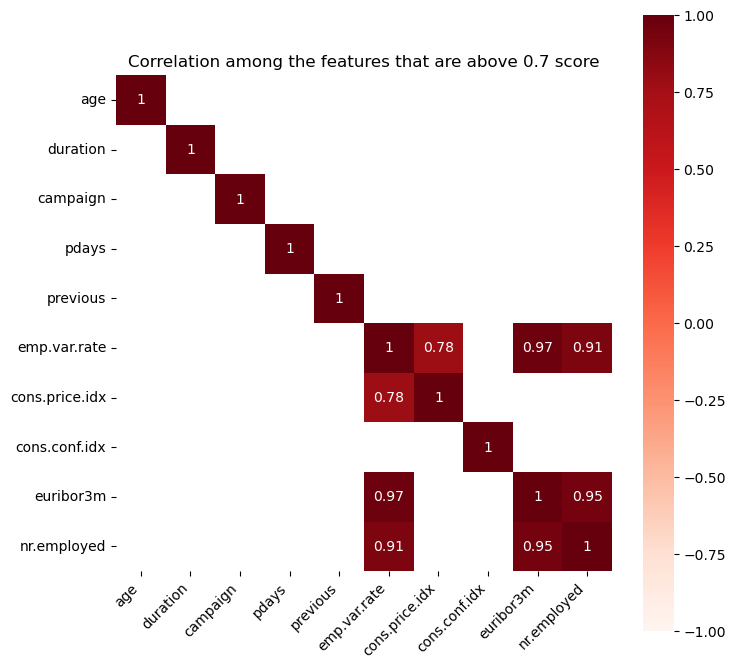

In [17]:
#Describe data and visualize it
corr = df2.corr()

plt.figure(figsize=(8,8))
ax = sns.heatmap(
    corr[abs(corr) >=.7], 
    vmin=-1, vmax=1, center=0,
    cmap="Reds",
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

plt.title('Correlation among the features that are above 0.7 score')
plt.savefig("results/EDA_feature_corr")
plt.show()


#### Data Observations
* Age: Most people subscribe to the term deposit at age 30-40. These are also the age rage that the direct marketing campaigns target.
* Job: Administrators, blue-collars, and technicians are mostly targeted by the direct marketing campaigns.
* Marital status: The campaigns target mostly married people as they are more likely to perform term deposit.
* Education: the higher the education level, the more likely the term deposit
* Has Housing Loan?: People who have a mortgage are less likely to go for term deposits
* Contact method: Best way to reach a client is via cell phone .
* Month: May is the busiest month reason could be due to sunny wether. December is the least busy month, because of the holidays season.
* Day of week: Thursday and Monday are the busiest days while Friday is the least busy day of the week as client are in the weekend mood hence don't want to consider term deposit.
* Other social and economic context attributes such as
  * emp.var.rate: employment variation rate
  * cons.price.idx: consumer price index
  * cons.conf.idx: consumer confidence index
  * euribor3m: euribor 3 month rate
  * nr.employed: number of employees
  * are highly correlated based on the above metrics, and are excluded for analysis

In [18]:
selected_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'duration','campaign', 'previous', 'poutcome', 'y']
df3 = df2[selected_features]


#### Encoding y to numeric

In [19]:
df3.y.replace({'no': 0, 'yes': 1}, inplace=True)
df3.y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41153, dtype: int64

#### Encoding non-numeric features

In [20]:
# Encode categorical columns
cols_ohe = ["job", "marital", "education", "month", "poutcome"]
cols_le = ["default", "housing", "loan"]

# One-hot encoding
ohe = OneHotEncoder(sparse=False)
encoded_ohe = ohe.fit_transform(df3[cols_ohe])
encoded_ohe_df = pd.DataFrame(encoded_ohe, columns=ohe.get_feature_names_out(cols_ohe))

# Label encoding
le = LabelEncoder()
encoded_le_df = df3[cols_le].apply(le.fit_transform)

# Combine encoded categorical variables with the original dataframe
df_encoded = df3.drop(columns=cols_ohe + cols_le)
df_encoded = pd.concat([df_encoded, encoded_ohe_df, encoded_le_df], axis=1, join='inner')

In [21]:
df_encoded.y

0        0
1        0
2        0
3        0
4        0
        ..
41148    1
41149    0
41150    0
41151    1
41152    0
Name: y, Length: 41118, dtype: int64

In [22]:
# Normalize numeric variables
scaler = StandardScaler()
cols_numeric_2 = df_encoded.loc[:, df_encoded.columns!='y'].select_dtypes(exclude=['object']).columns
print(cols_numeric_2)
df_encoded[cols_numeric_2] = scaler.fit_transform(df_encoded[cols_numeric_2])
df_encoded.y

Index(['age', 'duration', 'campaign', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'default', 'housing', 'loan'],
      dtype='object')


0        0
1        0
2        0
3        0
4        0
        ..
41148    1
41149    0
41150    0
41151    1
41152    0
Name: y, Length: 41118, dtype: int64

In [23]:
# clean up dataset once more
df_final = data_sanity_check(df_encoded)

===Null values per columns: 
age                              0
duration                         0
campaign                         0
previous                         0
y                                0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_divorced                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university.degre

In [25]:
df_final.y

0        0
1        0
2        0
3        0
4        0
        ..
41148    1
41149    0
41150    0
41151    1
41152    0
Name: y, Length: 41103, dtype: int64

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [26]:
# Split the dataset into training and testing sets
X = df_final.drop(columns="y")
y = df_final["y"]

# Performed the train/test split with 30% test data and random state of 42 for shuffling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the size of the training and testing sets
print("X_train size:", X_train.shape)
print("y_train size:", y_train.shape)
print("X_test size:", X_test.shape)
print("y_test size:", y_test.shape)


X_train size: (28772, 44)
y_train size: (28772,)
X_test size: (12331, 44)
y_test size: (12331,)


In [27]:
X_train.describe()

,age,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success,default,housing,loan
count,28772.000000,28772.000000,28772.000000,28772.000000,28772.000000,28772.000000,28772.000000,28772.000000,28772.000000,28772.000000,...,28772.000000,28772.000000,28772.000000,28772.000000,28772.000000,28772.000000,28772.000000,28772.000000,28772.000000,28772.000000
mean,-0.004291,-0.002713,0.001718,-0.000259,0.001550,0.003970,-0.001528,0.000652,-0.000439,0.001902,...,-0.009383,-0.002303,0.001650,-0.001274,0.001427,-0.000430,-0.001598,-0.001126,-0.004757,0.003451
std,1.000539,0.997731,1.001941,0.994688,1.000897,1.002624,0.996165,1.001968,0.999283,1.004367,...,0.996673,0.996932,1.006111,0.994667,1.001874,1.000472,0.995848,0.999191,1.000167,1.002872
min,-2.210115,-0.977344,-0.566096,-0.349958,-0.581825,-0.538419,-0.191531,-0.162592,-0.276485,-0.208626,...,-0.708694,-0.332666,-0.132555,-0.117717,-0.339434,-2.514275,-0.185513,-0.514114,-1.087437,-0.452799
25%,-0.769933,-0.603169,-0.566096,-0.349958,-0.581825,-0.538419,-0.191531,-0.162592,-0.276485,-0.208626,...,-0.708694,-0.332666,-0.132555,-0.117717,-0.339434,0.397729,-0.185513,-0.514114,-1.087437,-0.452799
50%,-0.193860,-0.306144,-0.205110,-0.349958,-0.581825,-0.538419,-0.191531,-0.162592,-0.276485,-0.208626,...,-0.708694,-0.332666,-0.132555,-0.117717,-0.339434,0.397729,-0.185513,-0.514114,0.942400,-0.452799
75%,0.670250,0.237759,0.155876,-0.349958,1.718730,-0.538419,-0.191531,-0.162592,-0.276485,-0.208626,...,1.411047,-0.332666,-0.132555,-0.117717,-0.339434,0.397729,-0.185513,-0.514114,0.942400,-0.452799
max,5.566870,17.974404,19.288116,13.866973,1.718730,1.857288,5.221091,6.150382,3.616837,4.793278,...,1.411047,3.006015,7.544049,8.494922,2.946079,0.397729,5.390456,4.400871,0.942400,2.309953


In [28]:
y_train.describe()

count    28772.000000
mean         0.112609
std          0.316120
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64

In [29]:
y_train.unique()

array([1, 0])

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [32]:
%%time
# Instantiate a dummy classifier that always predicts the majority class
strategies = ['most_frequent', 'stratified', 'uniform']
  
test_scores = []

for s in strategies:
    
    dummy = DummyClassifier(strategy = s)
  
    # Fit the classifier on the training data
    dummy.fit(X_train, y_train)

    # Evaluate the classifier on the data
    accuracy_train = dummy.score(X_train, y_train)
    accuracy_test = dummy.score(X_test, y_test)
    # Print the baseline accuracy
    print(f"Strategy {s} --- Baseline accuracy train: {accuracy_train} --- Baseline accuracy test: {accuracy_test}")

Strategy most_frequent --- Baseline accuracy train: 0.8873905185597109 --- Baseline accuracy test: 0.8879247425188549
Strategy stratified --- Baseline accuracy train: 0.8000486584179063 --- Baseline accuracy test: 0.7991241586246046
Strategy uniform --- Baseline accuracy train: 0.5066731544557208 --- Baseline accuracy test: 0.4899034952558592
CPU times: user 16.1 ms, sys: 1.29 ms, total: 17.4 ms
Wall time: 16 ms


#### Observations

Using a dummy classifier as the baseline model because it is a type of classifier that doesn't tell you anything about the data and only uses simple rules to sort it. The classifier's behavior has nothing to do with the training data, since the trends in the training data are not taken into account. Instead, the class label is predicted by using one of the strategies. Here are a few of the ways that the dummy classifier tries to guess a class label:

* most_frequent: The classifier always guesses the class label that appears most often in the training data.
* stratified: It makes predictions based on how the training data is split up by class. It is different from the "most frequent" strategy because it gives each data point a chance of being the class label that comes up most often.
* uniform: It makes random predictions that are always the same.
* constant: The classifier always predicts a constant label, and it's mostly used to classify labels that don't belong to the majority class.



### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [33]:
%%time

# Configure the search space 
logreg_params = {'solver': ['liblinear', 'lbfgs'], 'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10, 100], 'class_weight': [None, 'balanced']}
logreg_model=""

# Grid search CV for Logistic Regression
logreg_model = GridSearchCV(LogisticRegression(), logreg_params, cv=5)
logreg_model.fit(X_train, y_train)

logreg_best_params = logreg_model.best_params_
print(f"Logistic Regression best param: {logreg_best_params}")

# score the logistic regression model on the data
train_accuracy = logreg_model.score(X_train, y_train)
test_accuracy = logreg_model.score(X_test, y_test)
# Print the train  accuracy
print("Logistic Regression accuracy train: {:.5f}".format(train_accuracy))
print("Logistic Regression accuracy test: {:.5f}".format(test_accuracy))

Logistic Regression best param: {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression accuracy train: 0.89959
Logistic Regression accuracy test: 0.89944
CPU times: user 2min 50s, sys: 2.57 s, total: 2min 52s
Wall time: 1min 2s


#### Observations
Compared to the Basic classifier, the Logistic Regression gives the slightly better score but not much.

### Problem 9: Score the Model

What is the accuracy of your model?

In [34]:
# accuracy of the model
print("Accuracy train: {:.5f}".format(train_accuracy))
print("Accuracy test: {:.5f}".format(test_accuracy))

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Calculate the precision, recall, and F1 score
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Print the performance metrics
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))


Accuracy train: 0.89959
Accuracy test: 0.89944
Precision: 0.606
Recall: 0.293
F1 Score: 0.395


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression model')

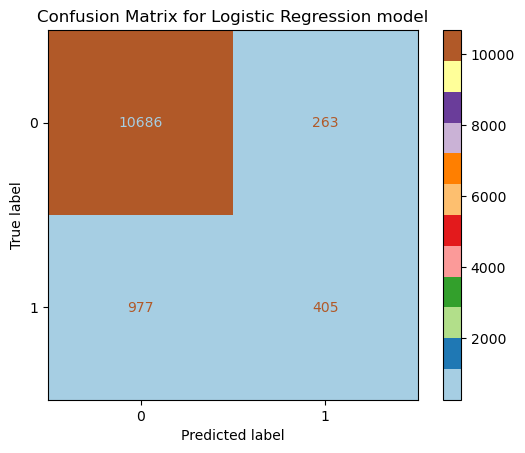

In [35]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix display
cmd = ConfusionMatrixDisplay(cm, display_labels=logreg_model.classes_)

# Plot the confusion matrix
cmd.plot(cmap= "Paired")
plt.title('Confusion Matrix for Logistic Regression model')

Roc AUC Score: 0.91053


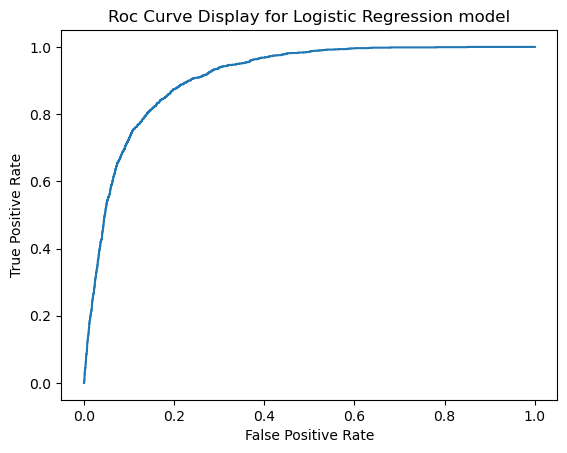

In [36]:
# display the ROC curve

y_score = logreg_model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=logreg_model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('Roc Curve Display for Logistic Regression model')

auc_score =roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:,1])
print("Roc AUC Score: {:.5f}".format(auc_score))

#### Observations
The ROC AUC score tells us how efficient the model is. The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes.


Text(0.5, 1.0, 'Precision vs Recall for Logistic Regression model')

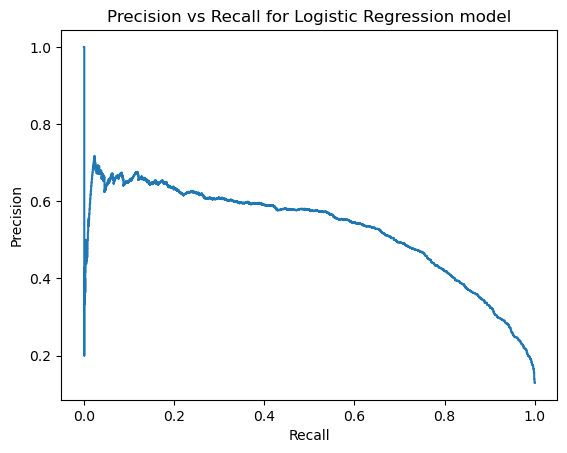

In [37]:
# display the precision recall curve
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=logreg_model.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
plt.title('Precision vs Recall for Logistic Regression model')

#### Observations
- 10,686 true positive (TP) predictions, where the real data were actually positive and were correctly predicted as positive by the classifier.
- 263 false positive (FP) predictions, such that the real data were actually negative but were incorrectly predicted as positive by the classifier.
- 977 false negative (FN) predictions, where the real data were actually positive but were incorrectly predicted as negative by the model.
- 405 true negative (TN) predictions that were actually negative and were correctly predicted as negative by the model.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [38]:
# Initialize an empty DataFrame to store the performance
df_performance = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])

In [39]:
# Model params for GridSearchCV
dec_tree_params = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree'], 'leaf_size': [20, 30, 40]}
svm_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto'], 'class_weight': [None, 'balanced']}

In [40]:
# GridSearch for Decision Tree
dec_tree_grid = GridSearchCV(DecisionTreeClassifier(), dec_tree_params, cv=5)
dec_tree_grid.fit(X_train, y_train)
dec_tree_best_params = dec_tree_grid.best_params_
print("Decision Tree best params:", dec_tree_grid.best_params_)

Decision Tree best params: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}


##### !!! Precautions, the next cell can take 25 minutes to execute !!!

In [41]:
#knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
#knn_grid.fit(X_train, y_train)

In [ ]:
knn_best_params = knn_grid.best_params_
print("KNN best params:", knn_grid.best_params_)

##### !!! Precautions, the next cell can take 6 hours to execute !!!

In [ ]:
# GridSearch for SVM
#svm_grid = GridSearchCV(SVC(), svm_params, cv=5)
#svm_grid.fit(X_train, y_train)
svm_best_params = svm_grid.best_params_
print("SVM best params:", svm_grid.best_params_)

#### Observations
From the GridSearch, we are able to identify the best params for each model as below

In [42]:
# Model parameters
log_reg_params = {'C': 100.0, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
dec_tree_params = {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
knn_params = {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 7, 'weights': 'uniform'}
svm_params = {'C': 1.0, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

In [86]:
# Train and evaluate the models
classifiers = {
    "Logistic Regression": LogisticRegression(**log_reg_params),
    "Decision Trees": DecisionTreeClassifier(**dec_tree_params),
    "KNN": KNeighborsClassifier(**knn_params),
    "SVM": SVC(**svm_params)
}

# Custom function to evaluate metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return {"Test Accuracy": accuracy, "Test f1": f1, "Test Precision": precision, "Test Recall": recall}

# Train and evaluate each classifier
metrics = {}
df_metrics = []
df_performance = []
df_performance = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])

for model, clf in classifiers.items():
    # Train the model and capture execution time
    start_time = time.time()

    clf.fit(X_train, y_train)

    end_time = time.time()
    train_time = end_time - start_time

    # Accuracy on train and test data
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    
    # model performance
    df_model_performance = pd.DataFrame({'Model': [model], 'Train Time': [train_time], 'Train Accuracy': [train_accuracy], 'Test Accuracy': [test_accuracy]})

    # Compute all other metrics
    y_pred = clf.predict(X_test)
    metrics[model] = calculate_metrics(y_test, y_pred)
    
    # Store the performance
    df_performance = pd.concat([df_performance, df_model_performance], ignore_index=True)

In [88]:
df_metrics = pd.DataFrame(metrics).T
df_metrics.reset_index(inplace=True)
df_metrics = df_metrics.rename(columns = {'index':'Model'})
print(df_metrics)

                 Model  Test Accuracy   Test f1  Test Precision  Test Recall
0  Logistic Regression       0.842511  0.539810        0.401339     0.824168
1       Decision Trees       0.902360  0.465364        0.602299     0.379161
2                  KNN       0.890114  0.265583        0.529158     0.177279
3                  SVM       0.855162  0.533925        0.417551     0.740232


In [89]:
print(df_performance)

                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.161063        0.840574       0.842511
1       Decision Trees    0.050087        0.903274       0.902360
2                  KNN    0.006314        0.906923       0.890114
3                  SVM   31.905507        0.850966       0.855162


#### Review of the performance df

In [113]:
df_results = []
df_results = pd.merge(df_performance, df_metrics)
df_results

,Model,Train Time,Train Accuracy,Test Accuracy,Test f1,Test Precision,Test Recall
0,Logistic Regression,0.161063,0.840574,0.842511,0.539810,0.401339,0.824168
1,Decision Trees,0.050087,0.903274,0.902360,0.465364,0.602299,0.379161
2,KNN,0.006314,0.906923,0.890114,0.265583,0.529158,0.177279
3,SVM,31.905507,0.850966,0.855162,0.533925,0.417551,0.740232


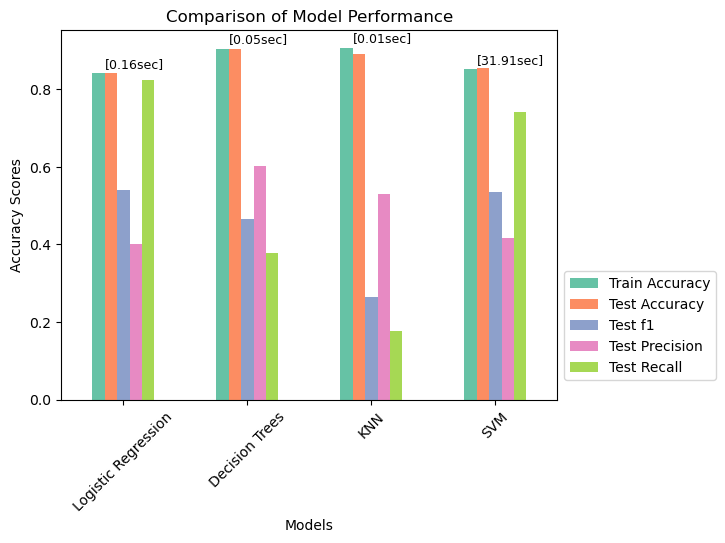

In [135]:
# Create the side-by-side bar plots for Train Accuracy and Test Accuracy
colors = [cmap(i) for i in range(len(df_results.columns))]
ax = df_results.loc[:, df_results.columns != "Train Time"].plot.bar(rot=0, color = colors)

# Set labels
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.xticks(bar_positions, df_results["Model"], rotation=45)
plt.title('Comparison of Model Performance')

# Visualize the 'Train Time' on top of the 'Train Accuracy' bar
for idx, value in enumerate(df_results['Train Time']):
    ax.text(idx - 0.15, df_results['Train Accuracy'][idx] + 0.015, f'[{value:.2f}sec]', fontsize=9)

# Display the legend outside the plot area
ax.legend(loc='center left', bbox_to_anchor=(1, 0.2))

# Display the plot
plt.show()

#### Observations
From the chart, the KNN and Decision Tree classifers have the highest test accuracy of 0.906923. The highest precision of 0.602299 is from the Decision tree model. The highest F1 score belongs to the Logistic Regression model.

The business needs and trade-offs between the different evaluation metrics will determine which classifier is best. If the bank cares most about overall accuracy and precision (i.e., reducing false positives), then the SVM classifier would be the best choice. But if the bank cares more about recall (catching more true positives) and finding a balance between precision and recall, the Decision Trees classifier might be a better choice.

When choosing the best model, it's important to think about the business context and goals, as well as whether or not the hyperparameters of the classifiers can be tweaked to improve their performance.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions